<a href="https://colab.research.google.com/github/tohnperfect/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ใช้ data กรมอุตุ

In [3]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/GroupQuiz1/Group3_ณัฐธิดา_ศุภัสรา_เฉลิมเกียรติ_พิทวัส.csv')

In [4]:
weather_data.shape

(8169, 13)

In [5]:
weather_data.head()

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,22.8,25.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,23.1,24.3,2011-10-05


In [6]:
data_features = weather_data.iloc[:,4:-1]
data_features.head()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,1007.49,86,3,10,3,22.9,22.1,25.6
3,1008.28,80,2,8,0,21.9,22.8,25.8
4,1009.88,86,2,10,2.2,21.7,23.1,24.3


In [7]:
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [8]:
data_features.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
อุณหภูมิตุ้มแห้ง      float64
dtype: object

In [9]:
data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(int)

ValueError: ignored

In [10]:
weather_data[weather_data.eq('-').any(1)]

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
305,ขอนแก่น,3,10,2013,1009.88,78,4,4,-,23.5,24.3,27.9,2013-10-03
306,ขอนแก่น,4,10,2013,1009.47,73,2,2,-,21.9,23.7,27.5,2013-10-04
307,ขอนแก่น,5,10,2013,1008.08,69,3,3,-,20.7,22.5,27.3,2013-10-05
308,ขอนแก่น,6,10,2013,1008.35,72,5,5,-,21.3,22.8,27.1,2013-10-06
309,ขอนแก่น,7,10,2013,1009.30,72,2,2,-,21.3,23.5,27.0,2013-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,หนองคาย,8,12,2021,1016.96,62,2,-,0,13.4,14.8,21.6,2021-12-08
8092,หนองคาย,14,12,2021,1014.85,69,2,-,0,15.9,16.2,22.3,2021-12-14
8093,หนองคาย,15,12,2021,1012.80,66,1,-,0,15.8,16.5,23.3,2021-12-15
8117,หนองคาย,8,1,2022,1014.94,68,2,-,0,17.4,17.8,24.2,2022-01-08


In [11]:
weather_data[weather_data['ความเร็วลม'].eq('-')]

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
1079,ขอนแก่น,21,10,2018,1012.65,87,-,-,53.3,23.5,24.5,25.8,2018-10-21
1122,ขอนแก่น,3,12,2018,1011.47,61,-,-,-,19.7,22.7,28.5,2018-12-03
1773,นครพนม,18,1,2012,1008.50,73,-,4,0,20.2,20,25.6,2012-01-18
1776,นครพนม,21,1,2012,1009.51,89,-,7,1.2,22.0,21.1,24.2,2012-01-21
1856,นครพนม,10,11,2012,1009.45,73,-,4,0,23.9,24.9,29.7,2012-11-10
1862,นครพนม,16,11,2012,1011.50,70,-,6,0,21.0,22.2,27.5,2012-11-16
1927,นครพนม,20,1,2013,1015.58,65,-,2,0,15.0,15.3,22.7,2013-01-20
1995,นครพนม,29,10,2013,1014.22,67,-,1,-,19.4,20.6,26.5,2013-10-29
2063,นครพนม,5,1,2014,1013.33,68,-,-,-,14.0,-,21.0,2014-01-05
2125,นครพนม,8,10,2014,1011.17,72,-,8,0,21.3,23.0,27.1,2014-10-08


In [12]:
data_features_d = data_features[data_features.eq('-').any(1)==False]
data_features_d.shape

(5208, 8)

In [13]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]
data_features_d.shape

(5061, 8)

### แปลงให้เป็นตัวเลข

In [14]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [15]:
data_features_d.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,2.284726,3.308832,1.556194,18.420944,19.933570,25.002667
std,3.158633,9.433792,1.209540,2.494353,6.816712,3.630472,3.295887,2.720534
min,1002.040000,38.000000,0.000000,0.000000,0.000000,1.500000,6.800000,11.800000
25%,1010.760000,64.000000,1.000000,1.000000,0.000000,16.100000,17.900000,23.500000
50%,1012.610000,69.000000,2.000000,3.000000,0.000000,18.500000,20.300000,25.400000
75%,1014.710000,77.000000,3.000000,5.000000,0.000000,21.200000,22.500000,26.900000
max,1026.100000,99.000000,10.000000,10.000000,112.400000,28.400000,26.700000,31.000000


In [16]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,6]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

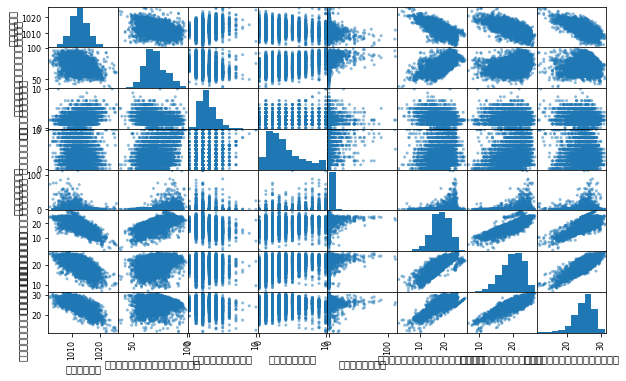

In [17]:
pd.plotting.scatter_matrix(data_features_d);

In [18]:
from matplotlib import pyplot as plt

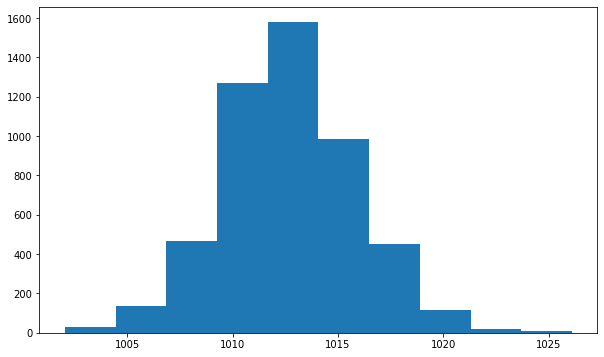

In [19]:
plt.hist(data_features_d['ความกด']);

In [20]:
from sklearn import preprocessing

### Standard scaler

In [21]:
#define
scaler = preprocessing.StandardScaler()
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_s = scaler.transform(data_features_d)

In [22]:
data_features_d_s

array([[-2.29910857,  1.33170074,  0.5914187 , ...,  1.59197655,
         1.47666181,  0.95480871],
       [-1.92549238,  2.28581221, -0.23542385, ...,  1.53688186,
         0.93047261,  0.21958617],
       [-1.65952832,  1.64973789,  0.5914187 , ...,  1.23386103,
         0.65737801,  0.21958617],
       ...,
       [ 1.25024518, -0.57652221, -1.06226641, ..., -0.88728479,
        -1.49703494, -0.8464865 ],
       [ 0.81647046, -0.89455937, -0.23542385, ..., -0.7220007 ,
        -0.73843883, -0.44211411],
       [ 0.10406672, -0.57652221, -0.23542385, ..., -0.17105374,
        -0.28328116,  0.14606392]])

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([-3.3851285 , -2.62333143, -1.86153436, -1.09973729, -0.33794022,
         0.42385684,  1.18565391,  1.94745098,  2.70924805,  3.47104512,
         4.23284218]),
 <a list of 10 Patch objects>)

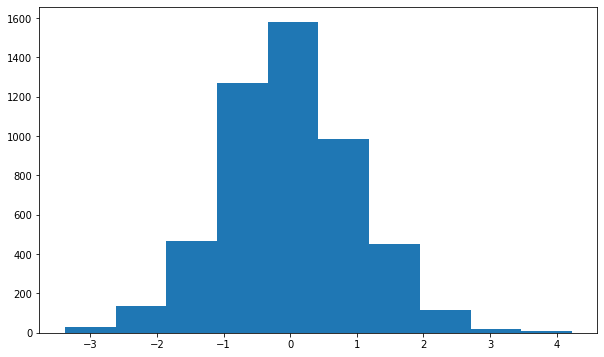

In [23]:
plt.hist(data_features_d_s[:,0])

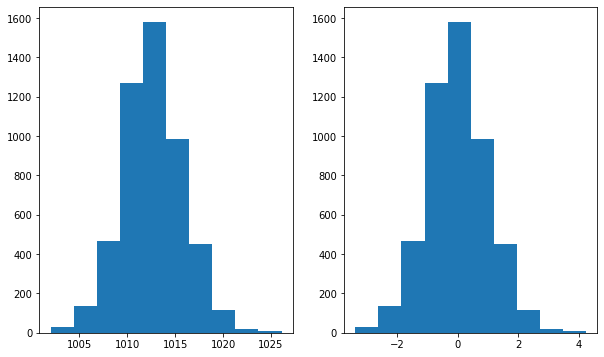

In [24]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0]);

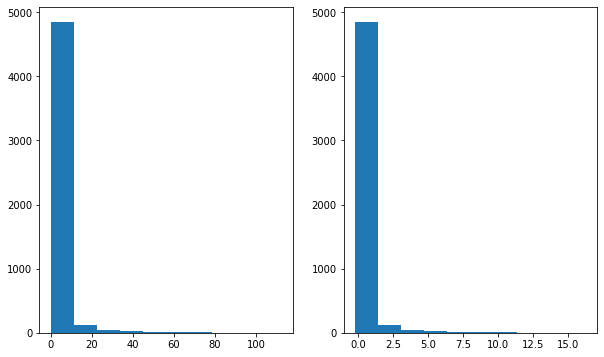

In [25]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,4]);

### Min-max normalization

In [26]:
#define
scaler = preprocessing.MinMaxScaler()
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_norm = scaler.transform(data_features_d)

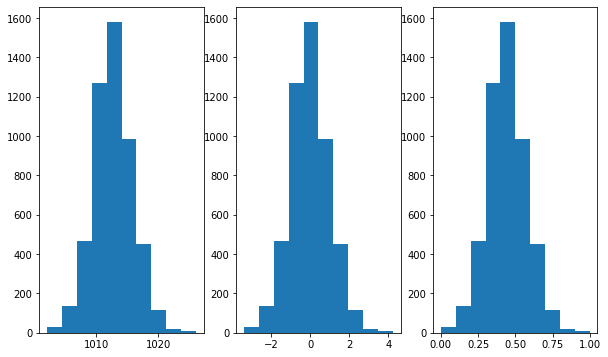

In [27]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0])
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]);

# Discritization

In [52]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/ส่ง data บ้าน/30.ศศิวิมล วิลาชัย.csv')

In [53]:
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [54]:
home_data.shape

(100, 22)

### ลบ record ที่ ค่า sell price เป็นค่าว่าง

In [55]:
home_data = home_data.dropna(subset=['sell_price'])

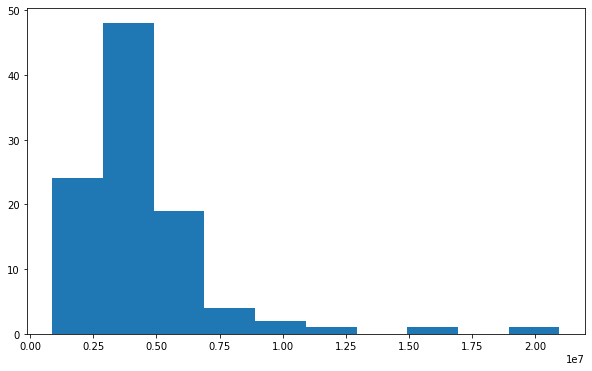

In [56]:
plt.hist(home_data['sell_price']);

### แปลงค่า sell_price 
- ราคาต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่าง 5m-10m ให้เป็น 2
- ราคา 10m ขึ้นไป ให้เป็น 3 

In [43]:
home_data1 = home_data[home_data['sell_price']<=5000000]
home_data2 = home_data[(home_data['sell_price']>5000000) & (home_data['sell_price']<10000000)]
home_data3 = home_data[home_data['sell_price']>=10000000]

In [44]:
home_data1.shape

(76, 23)

In [45]:
home_data1['sell_price_class'] = 1
home_data2['sell_price_class'] = 2
home_data3['sell_price_class'] = 3

<ipython-input-45-b13373dc2aa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_data1['sell_price_class'] = 1
<ipython-input-45-b13373dc2aa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_data2['sell_price_class'] = 2
<ipython-input-45-b13373dc2aa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [46]:
home_data = pd.concat([home_data1,home_data2,home_data3])

In [47]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11,sell_price_class
19,1070.0,NaN,NaN,44.8,NaN,0.0,NaN,0.0,0.0,0.0,...,ศิลา-โกทา-หนองไผ่-บ้านดอน,0.0,880000.0,0,0,2,6,7,11,1
20,1123.0,0.0,0.0,51.9,NaN,0.0,NaN,0.0,0.0,0.0,...,ศิลา-โกทา-หนองไผ่-บ้านดอน,0.0,905000.0,0,1,1,1,3,4,1
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,2
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,เหล่านาดี-บ้านสะอาด-บ้านโจด,เหล่านาดี,10263000.0,0,0,1,5,7,11,3
40,3622.0,0.0,1.0,69.0,2.0,4.0,4.0,0.0,3.0,900.0,...,โนนทัน-บึงแก่นนคร,NaN,12500000.0,0,1,1,1,4,6,3
45,5978.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,ถนนกลางเมือง,20949000.0,0,1,2,5,5,7,3


(array([76.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  4.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

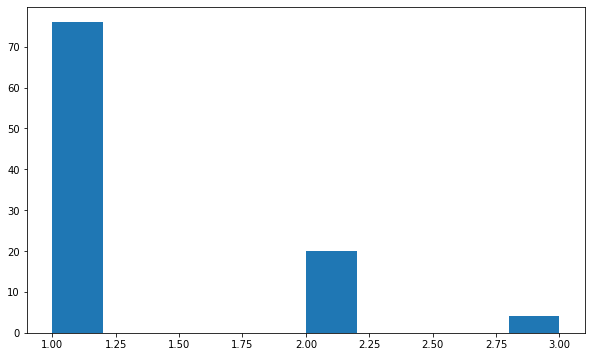

In [48]:
plt.hist(home_data['sell_price_class'])

In [50]:
home_data[home_data['sell_price']<500000]=1

In [51]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11,sell_price_class
19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
20,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,2
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,เหล่านาดี-บ้านสะอาด-บ้านโจด,เหล่านาดี,10263000.0,0,0,1,5,7,11,3
40,3622.0,0.0,1.0,69.0,2.0,4.0,4.0,0.0,3.0,900.0,...,โนนทัน-บึงแก่นนคร,NaN,12500000.0,0,1,1,1,4,6,3
45,5978.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,ถนนกลางเมือง,20949000.0,0,1,2,5,5,7,3


In [58]:
price_under=home_data[home_data['sell_price']<5000000]
price_under.insert(22,'price_class','1')
price_under

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11,price_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,0,2,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,19483.0,0.0,0.0,59.9,2.0,0.0,0.0,0.0,0.0,255.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,4235000.0,0,0,2,6,9,11,1
93,19492.0,0.0,0.0,90.3,2.0,0.0,0.0,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4707000.0,0,0,2,3,4,7,1
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9,1
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,3,3,4,1


In [62]:
home_data['grade']=''
home_data['grade'][(home_data['sell_price']>10000000)]=3

<ipython-input-62-baa8748ddb07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_data['grade'][(home_data['sell_price']>10000000)]=3


In [63]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11,grade
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14,
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9,
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,3,3,4,


In [64]:
def filter(x):
    if x < 5000000:
        return "1"
    if x > 10000000:
        return "3"

In [65]:
home_data['new_class'] = home_data['sell_price'].apply(filter)

In [66]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11,grade,new_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,NaN,2700000.0,0,1,1,1,1,2,,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,NaN,2600000.0,0,1,2,3,5,5,,1
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โพธิสาร,5900000.0,0,0,0,2,2,3,,None
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,NaN,4400000.0,0,0,2,4,8,12,,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ศรีจันทร์,2750000.0,0,1,2,3,4,4,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,NaN,5500000.0,0,2,3,7,10,14,,None
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,7911000.0,0,0,0,1,4,9,,None
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,NaN,2990000.0,1,1,2,4,7,9,,1
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,3,3,4,,1


In [ ]:
home_data.loc[home_data['sell_price']<5000000,'sellpriceclass']=1

In [67]:
import numpy as np

In [ ]:
np.where(home_data['sell_price']<5000000,1,home_data['sell_price'])

In [76]:
x=home_data[['sell_price']]

In [77]:
a = x[(x['sell_price']<=5000000)]

In [78]:
a

,sell_price
0,2700000.0
1,2600000.0
3,4400000.0
4,2750000.0
9,4070000.0
...,...
92,4235000.0
93,4707000.0
97,2990000.0
98,4000000.0


In [79]:
a.iloc[0:76]=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [80]:
a

,sell_price
0,1.0
1,1.0
3,1.0
4,1.0
9,1.0
...,...
92,1.0
93,1.0
97,1.0
98,1.0


In [81]:
home_data['XX']=a['sell_price']

In [82]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11,grade,new_class,XX
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,2700000.0,0,1,1,1,1,2,,1,1.0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,2600000.0,0,1,2,3,5,5,,1,1.0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,5900000.0,0,0,0,2,2,3,,None,NaN
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,4400000.0,0,0,2,4,8,12,,1,1.0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,2750000.0,0,1,2,3,4,4,,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,5500000.0,0,2,3,7,10,14,,None,NaN
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,7911000.0,0,0,0,1,4,9,,None,NaN
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,2990000.0,1,1,2,4,7,9,,1,1.0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,4000000.0,0,0,0,3,3,4,,1,1.0


# one-hot-encoder

In [83]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone']) 

In [84]:
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
